In [1]:
# For '(a)', '(b)' text position, use transform=ax.transAxes is easier

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.style.use('classic')
#This binning with the error calculated in this way is not good if the input data has too few point. 
# For example, if nbins=size(x), error will be 0.

## anothe way is to use H,xedges,yegdes,histogram2d(t,A,bins=[n1,n2],weights=A) with n2==n1, 
## use then np.ma.masked_where(H==0,H), H.T (n1 and n2 can be two arrays)
def lin_binning(x,y,nbins): #input: data x,y ; No of points you want nbins  
    #nbins+=1     
    x = x[~np.isnan(x)] # remove nan from the data
    y = y[~np.isnan(y)]
    
    n, _ = np.histogram(x, bins=nbins) # n=len(x)/nbins
    n[np.argwhere(n==0)]=1 #repalce 0 by 1 for dividing later
    meanx= np.histogram(x, bins=nbins, weights=x)[0] / n
    meany= np.histogram(x, bins=nbins, weights=y) [0]/ n
    meany2= np.histogram(x, bins=nbins, weights=y*y)[0] / n
    std_y = np.sqrt(meany2 - meany*meany)/np.sqrt(n)
    
    return meanx,meany,std_y #putput: nbins rows, 3 col

def log_binning(x,y,nbins):
    nbins+=1
    x = x[~np.isnan(x)] # remove nan from the data
    #print(x.shape)
    y = y[~np.isnan(y)]
    #print(y.shape)
    
    max_x = np.log10(max(x))
    min_x = np.log10(min(x))
    bins = np.logspace(min_x,max_x,num=nbins)
    # Based off of: http://stackoverflow.com/questions/15556930/turn-scatter-data-into-binned-data-with-errors-bars-equal-to-standard-deviation
    bin_no_pts= np.histogram(x, bins)[0] #the no fo data points in every bin
    bin_no_pts[np.argwhere(bin_no_pts==0)]=1 #repalce 0 by 1 for dividing later
    #print "binning schem:";print bin_no_pts
    bin_means_x = (np.histogram(x,bins,weights=x)[0] / bin_no_pts)
    bin_means_y = (np.histogram(x,bins,weights=y)[0] / bin_no_pts)   
    bin_means_yy = (np.histogram(x,bins,weights=y*y)[0] / bin_no_pts)
    bin_std_y = np.sqrt( bin_means_yy - bin_means_y*bin_means_y)/np.sqrt(bin_no_pts)   

    return bin_means_x,bin_means_y,bin_std_y # output: nbins-rows, 3 cols

figsz=(6.5,5) #fig size
legfs=18 #legend fontsize
axfs=16 # axis label fontsize
tickfs=15# ticklabel fontsize
texfs=16 # annotante/tex fontsize
titfs=18# title fontsize
linw=1 #linewidth
glinw=0.5 #grid line width

In [352]:
print(1/0.0135538817)
print 1/0.08516
print(851.6/2/np.pi)
gamma = 0.8516 # rad/us/mT, muon gyromagnetic ratio
field = 200. # in mT
lamb = 2.5 # in us-1
lamb/(gamma*field)**2

73.7796021932
11.7426021606
135.536349537


8.618044093939935e-05

In [184]:
fpath='D:/4_muonSR/data_plot/rate_to_lambda.txt' # T-rate from LTF zero field fitting
t_rate = np.genfromtxt(fpath,skip_header=1,usecols=(0,7))
fpath1='D:/4_muonSR/data_plot/lambdaZF_to_F.txt' # T-Lambda from GPS zero field fitting
t_lambda = np.genfromtxt(fpath1,skip_header=1) 
print t_lambda

[[  2.31000000e+00   8.36300000e-01   1.58000000e+00   3.92800000e-01]
 [  2.94000000e+00   7.59200000e-01   2.30000000e+00   4.49300000e-01]
 [  5.21000000e+00   6.56700000e-01   2.93000000e+00   4.54400000e-01]
 [  7.44000000e+00   6.30600000e-01   5.22000000e+00   4.74900000e-01]
 [  9.64000000e+00   6.11200000e-01   7.44000000e+00   4.75300000e-01]
 [  1.18500000e+01   5.40800000e-01   9.65000000e+00   4.90100000e-01]
 [  2.11700000e+01   5.24300000e-01   1.58400000e+01   4.90200000e-01]
 [  3.18000000e+01   4.96800000e-01   2.11700000e+01   4.94000000e-01]
 [  4.23600000e+01   4.80100000e-01   3.18000000e+01   4.87200000e-01]
 [  1.00000000e+02   2.58900000e-01   4.23600000e+01   4.75000000e-01]
 [  2.00000000e+02   2.69000000e-02   1.00000000e+02   1.88800000e-01]
 [  3.00000000e+02   1.10000000e-03   2.00000000e+02   4.00000000e-02]
 [             nan              nan   3.00000000e+02   6.60000000e-03]]


[ 10.44320486  13.92427315  20.88640973]
[ 3.31139358  6.32446341  2.27189462  3.12006861  2.58093911  2.42074289
  2.20759572  3.20554995  2.98729974  1.599124    1.52612052  1.02185653
  1.15084498  0.80138749  0.64405086]


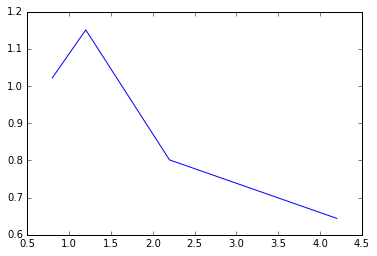

In [209]:
# estimate the fluctuating rate from Lambda
lam = np.array([0.8,0.6,0.4]) # in us^-1
fdelta = 2.4 # in mT
gamma = 0.1355 # MHz/mT
gamma = 0.8516  # rad/us/mT

# rate in MHz
print 2*(gamma*fdelta)**2/lam

fdelta = 2.2 # in mT
omega = 0.8516*0.

lam_cal = 2*(gamma*fdelta)**2 * t_rate[:,1]/(omega**2+t_rate[:,1]**2)
print lam_cal
plt.plot(t_rate[11:,0],lam_cal[11:])
plt.show()

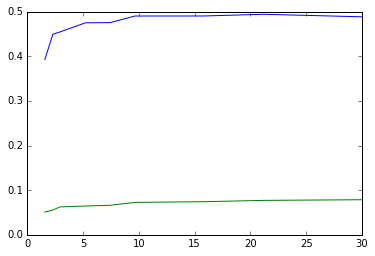

In [210]:
# calculate the 50mT field lambda from ZF lambda assumming field distribution width is 2.2mT

gamma = 0.8516 # rad/us/mT, muon gyromagnetic ratio
fdelta = 2.5 # in mT, field distribution width
omega = gamma*50 # the corresponding frequency of a 50mT field 

lam_zf = t_lambda[:,1]
lam_f = t_lambda[:,3]

rate2_zf = (2*(gamma*fdelta)**2 / lam_zf)**2

lam_f_cal = lam_zf * rate2_zf/(omega**2 + rate2_zf)

plt.plot(t_lambda[:,2],lam_f, t_lambda[:,2],lam_f_cal)
plt.xlim([0,30])
plt.show()

[ 0.3928  0.4493  0.4544  0.4749  0.4753  0.4901  0.4902  0.494   0.4872
  0.475   0.1888  0.04    0.0066] -36.261128 [ 455.78787451  521.34799393  527.26581002  551.05310999  551.51725243
  568.69052265  568.80655826  573.21591142  565.32548997  551.1691456
  219.07523092   46.41424384    7.65835023]
[   77.30422635    61.98625633    60.67630796    55.41645507    55.31305374
    51.4217142     51.39480702    50.36344335    52.19748952    55.39061045
   185.81642238   905.24638754  5493.89909491]


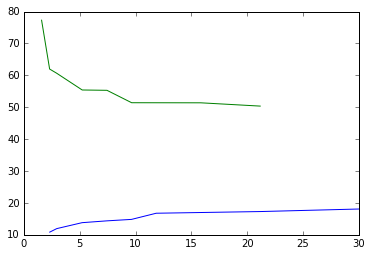

In [242]:
# cal the rate form lambda (ZF and 50mT)with assumed delta and external field

gamma = 0.8516 # rad/us/mT, muon gyromagnetic ratio

fdelta0 = 2.5 # in mT, field distribution width for zero field
fdelta = 5. # in mT, field distribution width 50mT field
omega = gamma*40. # the corresponding frequency of a 50mT external field: use 40mT for field inside the sample

lam_zf = t_lambda[:,1] # 
lam_f = t_lambda[:,3]

rate_zf = 2*(gamma*fdelta0)**2 / lam_zf
#print rate_zf

# use root equation cal v
a = lam_f
b = -2*(gamma*fdelta)**2
c = lam_f*omega**2
print a,b,c        

rate_f = (-b+(b**2-4*a*c)**0.5)/(2*a)        
print rate_f

plt.plot(t_lambda[:-5,0],rate_zf[:-5], t_lambda[:-5,2],rate_f[:-5])
plt.xlim([0,30])
plt.show()

In [500]:
# decoupling 20mK
fpath11='D:/4_muonSR/data_plot/Fields7_0-5kG_20mk_GssKT_8us.dat'
data = np.genfromtxt(fpath11, dtype=None, skip_header=1,delimiter=",")

In [501]:
# decoupling 20mK
#here input the parameters
#####################
datasets    =7 #no of data sets
plotNo      =np.array((1,2,3,4,5,6)) #plot which datasets
theoryd     =datasets #no theory of data sets
 
binning_pts =70 # how many log binning points
lbinning_pts =100 # how many linear binning points
shiftd      =0.08# shift data by a value
####################
   
## log and linear binning
dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
datlin     = np.zeros((datasets,lbinning_pts,3)) #3D arrary, page,row,col, to store the binned data###linear binning 

theory_len = np.size(data[~np.isnan(data[:,datasets*3]),datasets*3]) # the datasets*3 th col is the first theoty dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 

#log and linear binning data
for idx, i in enumerate(3*plotNo): 
    dat[idx,:,:]=np.transpose(log_binning(data[:,i],data[:,i+1],binning_pts))
    datlin[idx,:,:]=np.transpose(lin_binning(data[:,i],data[:,i+1],lbinning_pts))
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i  
    datlin[i,:,1]=datlin[i,:,1]+shiftd*i  
for idx, i in enumerate(3*datasets+2*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i],data[:,i+1]+shiftd*idx    

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:43: RuntimeWarning: invalid value encountered in sqrt


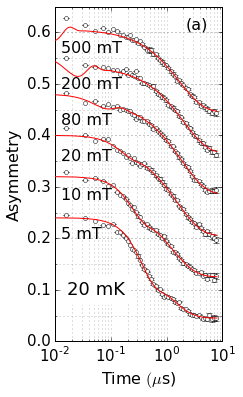

In [521]:
# decoupling 20mK
#plot data
#here input the parameters
#####################
#########This one allow plot part of the data#################################
fig=plt.figure(figsize=(3,6))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0.01, 10), ylim=(0., 0.65),xscale='log')

prange=10 #plot only t<prange part

fig_label=("ZF","5 mT","10 mT","20 mT","80 mT","200 mT","500 mT")
tex_pos=np.array((0.2,0.275,0.35,0.42,0.49,0.56))
markers=("o","<",">","^","d")
mkfaceCor=("red","black","blue","green","orange")

#####################
## Old: use plt.text() to plot text
# for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
#     ii=np.int(i)
#     plt.plot(theory[:,ii*2],theory[:,ii*2+1],color='red',linewidth=2)
#     plt.errorbar(dat[ii,:,0],dat[ii,:,1],dat[ii,:,2],label=fig_label[i],color='black', fmt='o',markersize='5', mfc='white', zorder=1)
#     plt.text(0.015, tex_pos[i],fig_label[i],size=texfs, ha='left', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))

## New: use plt.annotate().draggable() to plot text allowing dragging
for idx,i in enumerate(plotNo):
    t_filt, a_filt=theory[theory[:,idx*2]<prange,idx*2], theory[theory[:,idx*2]<prange,idx*2+1]
    plt.plot(t_filt,a_filt,color='red',linewidth=linw)
    t_filt, a_filt, e_filt=dat[idx,dat[idx,:,0]<prange,0],dat[idx,dat[idx,:,0]<prange,1],dat[idx,dat[idx,:,0]<prange,2]
    plt.errorbar(t_filt, a_filt, e_filt,label=fig_label[idx],color='black', fmt='o',markersize='4', mfc='white', zorder=1)
    #plt.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=linw)
    #plt.errorbar(dat[idx,:,0],dat[idx,:,1],dat[idx,:,2],label=fig_label[idx],color='black', fmt='o',markersize='4', mfc='white', zorder=1)
    ax.annotate(fig_label[i],xy=(0.013, tex_pos[idx]-0.005), fontsize=texfs, ha='left', va='bottom').draggable()
    #plt.text(0.015, tex_pos[i],fig_label[i],size=texfs, ha='left', va='center', backgroundcolor='white',zorder=0,bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))

ax.annotate("(a)",xy=(2.2, 0.6), fontsize=texfs, ha='left', va='bottom').draggable()
    
#title
plt.text(0.055, 0.1,'20 mK',size=titfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))
#axis lable and tick
plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)
plt.xticks( color='k', size=tickfs)
plt.yticks( color='k', size=tickfs)
#grid
ax=plt.gca() # get the fig axis
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
plt.grid(b=True, which='both', color='grey', marker='o',linewidth=glinw, zorder=0)

#put the tickline and gridlines below the fig border
# for k, spine in ax.spines.items():  #ax.spines is a dictionary
#     spine.set_zorder(3) # at less 3

ax.set_axisbelow(True)# set gridline below fram and data

fig.savefig("D:/4_muonSR/data_plot/ltf_20mk_decoupling.eps", bbox_inches="tight",verbose=True) 
plt.show()

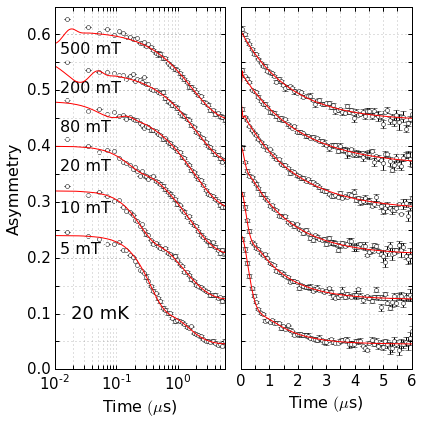

In [533]:
## Plot log and linear 
fig_label=("ZF","5 mT","10 mT","20 mT","80 mT","200 mT","500 mT")
tex_pos=np.array((0.2,0.275,0.35,0.42,0.49,0.56))+0.015
markers=("o","<",">","^","d")
mkfaceCor=("red","black","blue","green","orange")

fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True,figsize=(6,6))

ax = axs[0]
for idx, i in enumerate(plotNo):
    ax.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=linw) 
    ax.errorbar(dat[idx,:,0],dat[idx,:,1],dat[idx,:,2],color='black', fmt='o',markersize='4', mfc='white', zorder=1)   
    ax.text(0.012,tex_pos[idx],fig_label[i],size=texfs, ha='left', va='center', 
            backgroundcolor='white',zorder=1,bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))#zorder=1 above axis
    
# ax.text(2.2,0.6,"(a)",size=18, ha='center', va='center', 
#             backgroundcolor='white',zorder=3,bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))

ax.text(0.055, 0.1,'20 mK',size=titfs, ha='center', va='center', backgroundcolor='white',zorder=1,bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))

#plt.xscale('log') # this one changes all the fig scales
ax.set_xscale('log')
ax.set_xlim(0.01, 6)
ax.set_ylim(0, 0.65)
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
#plt.minorticks_on() # not working
ax.grid(b=True,which='both', color='grey', marker='o',clip_on=True,zorder=0,linewidth=glinw)# but gridline above frame though at the same layer
ax.tick_params(axis='both',which='both',width=1,length=4,labelsize=tickfs) # tick (bar size and label size):if both: x or and 2nd both: minor or major
#ax.xaxis.set_tick_params(width=2,length=6,labelsize=20)
#ax.set_xticks(ax.get_xticks()[1:-1]) # remove the first and last tick labels

ax.set_ylabel('Asymmetry',size=axfs)
ax.set_xlabel(r"Time $(\mu$s)",size=axfs)
#plt.legend()
#plt.ylable('Asymmetry',size=axfs) # this one only set the axis lable for the last fig

ax.set_axisbelow(True)# set gridline below fram and data
#put the tickline and gridlines below the fig border
# for k, spine in ax.spines.items():  #ax.spines is a dictionary
#     spine.set_zorder(10)
    
## linear x plot
ax = axs[1]
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    ii=np.int(i)
    ax.plot(theory[:,ii*2],theory[:,ii*2+1],color='red',linewidth=1)
    ax.errorbar(datlin[ii,:,0],datlin[ii,:,1],datlin[ii,:,2],label=fig_label[i],color='black', fmt='o',markersize='4', mfc='white', zorder=1)

ax.set_xlim(0.01, 6)
#plt.xscale('linear')# it changes all the figs.
ax.set_xlabel(r"Time $(\mu$s)",size=axfs)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.grid(b=True, which='minor', color='grey', marker='o',zorder=0,linewidth=glinw)
ax.tick_params(axis='both',which='both',width=1,length=4,labelsize=tickfs) # tick (bar size and label size):if both: x or and 2nd both: minor or major

ax.set_axisbelow(True)# set gridline below fram and data
#plt.axisbelow=True # not working
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)
fig.tight_layout()
fig.savefig("D:/4_muonSR/data_plot/new_ltf_20mk_decoupling.eps", bbox_inches="tight",verbose=True) 
plt.show()

#ax.set_yticklabels([]) # if not share Y, then 2nd plot shows Yticklabels
#ax.xaxis.set_minor_locator(MultipleLocator(0.5))
#ax.xaxis.grid(True,'minor',linewidth=0.5)
#ax.xaxis.grid( which='minor', color='black', linestyle='--',zorder=0)

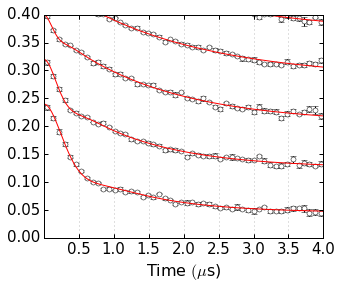

In [416]:
## Plot linear zoomed
fig_label=("ZF","5 mT","10 mT","20 mT","80 mT","200 mT","500 mT")
tex_pos=np.array((0.2,0.275,0.35,0.42,0.49,0.56))
markers=("o","<",">","^","d")
mkfaceCor=("red","black","blue","green","orange")

fig, axs = plt.subplots(nrows=1, ncols=1, sharey=True,figsize=(5,4))

# ax = axs[0]
# for idx, i in enumerate(plotNo):
#     ax.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=linw) 
#     ax.errorbar(dat[idx,:,0],dat[idx,:,1],dat[idx,:,2],color='black', fmt='o',markersize='4', mfc='white', zorder=1)   
#     ax.text(0.012,tex_pos[idx],fig_label[i],size=texfs, ha='left', va='center', 
#             backgroundcolor='white',zorder=0,bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))
    
# ax.text(2.2,0.6,"(a)",size=18, ha='center', va='center', 
#             backgroundcolor='white',zorder=3,bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))

# ax.text(0.055, 0.1,'20 mK',size=titfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', alpha=1, edgecolor='white', boxstyle='round'))

# #plt.xscale('log') # this one changes all the fig scales
# ax.set_xscale('log')
# ax.set_xlim(0.01, 6)
# ax.set_ylim(0, 0.65)
# plt.xticks( color='k', size=tickfs)
# plt.yticks( color='k', size=tickfs)

# ax.yaxis.set_minor_locator(MultipleLocator(0.05))

# plt.grid(b=True,which='both', color='grey', marker='o',clip_on=True,zorder=0)
# #plt.legend()
# #plt.ylable('Asymmetry',size=axfs) # this one only set the axis lable for the last fig
# ax.set_ylabel('Asymmetry',size=axfs)
# ax.set_xlabel(r"Time $(\mu$s)",size=axfs)
# ax.grid(b=True,which='minor', color='grey', marker='o',zorder=0)
# #put the tickline and gridlines below the fig border
# for k, spine in ax.spines.items():  #ax.spines is a dictionary
#     spine.set_zorder(10)


## linear x plot
ax = axs
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    ii=np.int(i)
    ax.plot(theory[:,ii*2],theory[:,ii*2+1],color='red',linewidth=1)
    ax.errorbar(datlin[ii,:,0],datlin[ii,:,1],datlin[ii,:,2],label=fig_label[i],color='black', fmt='o',markersize='5', mfc='white', zorder=1)

ax.set_xlim(0.01, 4)
ax.set_ylim(0., 0.4)
#plt.xscale('linear')# it changes all the figs.
ax.set_xlabel(r"Time $(\mu$s)",size=axfs)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.grid(b=True,which='minor', color='grey', marker='o',zorder=0)
ax.tick_params(axis='both',which='both',width=1,length=4,labelsize=tickfs) # tick (bar size and label size):if both: x or and 2nd both: minor or major

plt.show()

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:43: RuntimeWarning: invalid value encountered in sqrt


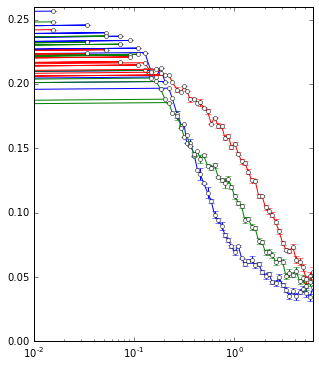

In [348]:
# decoupling 20mK
binning_pts =80 # how many binning points
dat= np.zeros((datasets,binning_pts,3)) #initilize a 3D arrary, page,row,col, to store the binned data

for idx, i in enumerate([0,3,6,9,12]):
    dat[idx,:,:]=np.transpose(log_binning(data[:,i],data[:,i+1],binning_pts))
    
fig=plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0.01, 6), ylim=(0., 0.26),xscale='log')    
    
fig_label=("20mK","300mK","500mK","600mK","800mK","1.2K")
markers=("o","<",">","^","d")
mkfaceCor=("red","black","blue","green","orange")

for i in (0,2,4):
    ii=np.int(i)
    ax.errorbar(dat[ii,:,0],dat[ii,:,1],dat[ii,:,2],label=fig_label[i], fmt='-o',ms='4', mfc='white', mec=None,zorder=1)
    #plt.scatter(dat[ii,:,0],dat[ii,:,1],marker='o',zorder=1)
    #plt.plot(dat[ii,:,0],dat[ii,:,1], marker = markers[i],markerfacecolor=mkfaceCor[i],markeredgecolor=None, linestyle = '')

In [3]:
# decoupling 300mK
fpath11='D:/4_muonSR/data_plot/Fields8_0-5kG_300mk_GssKT_8us.dat'
data = np.genfromtxt(fpath11, dtype=None, skip_header=1,delimiter="\t")
print data.shape

(13647L, 40L)


In [4]:
# decoupling 300mK
#here input the parameters
#####################
datasets    =8 #no of data sets
plotNo      =np.array((2,3,4,5,6,7)) #plot which datasets
theoryd     =datasets #no theory of data sets
   
binning_pts =70 # how many log binning points
lbinning_pts =100 # how many linear binning points
shiftd      =0.07# shift data by a value
####################
   
## log and linear binning
dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
datlin     = np.zeros((datasets,lbinning_pts,3)) #3D arrary, page,row,col, to store the binned data###linear binning 

theory_len = np.size(data[~np.isnan(data[:,datasets*3]),datasets*3]) # the datasets*3 th col is the first theoty dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 

#log and linear binning data
for idx, i in enumerate(3*plotNo): 
    dat[idx,:,:]=np.transpose(log_binning(data[:,i],data[:,i+1],binning_pts))
    datlin[idx,:,:]=np.transpose(lin_binning(data[:,i],data[:,i+1],lbinning_pts))
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i  
    datlin[i,:,1]=datlin[i,:,1]+shiftd*i  
for idx, i in enumerate(3*datasets+2*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i],data[:,i+1]+shiftd*idx    

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:43: RuntimeWarning: invalid value encountered in sqrt


C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


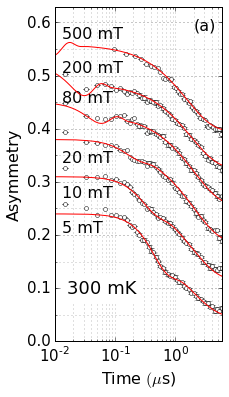

In [5]:
# decoupling 300mK
#plot data
#here input the parameters
#####################
#%matplotlib
fig=plt.figure(figsize=(3,6))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0.01, 6), ylim=(0., 0.63),xscale='log')

#fig_label=("5 mT","10 mT","20 mT","80 mT","200 mT","500 mT")
#tex_pos=np.array((0.21,0.285,0.37,0.42,0.49,0.57,0.65,0.70))
#tex_pos=np.array((0.2,0.275,0.35,0.43,0.495,0.569))
fig_label=("ZF","RF","5 mT","10 mT","20 mT","80 mT","200 mT","500 mT")
tex_pos=np.array((0.205,0.27,0.336,0.45,0.505,0.57))
markers=("o","<",">","^","d")
mkfaceCor=("red","black","blue","green","orange")
#####################
for idx,i in enumerate(plotNo):
    plt.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=linw)
    plt.errorbar(dat[idx,:,0],dat[idx,:,1],dat[idx,:,2],label=fig_label[idx],color='black', fmt='o',markersize='4', mfc='white', zorder=1)
    #plt.text(0.015, tex_pos[i],fig_label[i],size=texfs, ha='left', va='center', backgroundcolor='white',zorder=0,bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))
    ax.annotate(fig_label[i],xy=(0.013, tex_pos[idx]-0.005), fontsize=texfs, ha='left', va='bottom',zorder=1).draggable()

ax.annotate("(a)",xy=(2, 0.58), fontsize=texfs, ha='left', va='bottom').draggable()
ax.text(0.06, 0.1,'300 mK',size=titfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'))

plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)
plt.xticks( color='k', size=tickfs)
plt.yticks( color='k', size=tickfs)

ax=plt.gca() # get the fig axis
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.grid(b=True,which='both', color='grey', marker='o',zorder=0)
ax.set_axisbelow(True)# set gridline below fram and data

#fig.savefig("D:/4_muonSR/data_plot/ltf_300mk_decoupling.eps", bbox_inches="tight",verbose=True)      
fig.show()

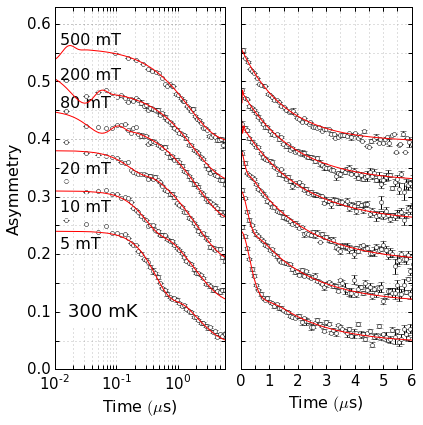

In [7]:
# plot log and linear
fig_label=("ZF","RF","5 mT","10 mT","20 mT","80 mT","200 mT","500 mT")
tex_pos=np.array((0.205,0.27,0.336,0.45,0.50,0.56))+0.012
markers=("o","<",">","^","d")
mkfaceCor=("red","black","blue","green","orange")

fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True,figsize=(6,6))

ax = axs[0]
for idx, i in enumerate(plotNo):
    ax.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=linw) 
    ax.errorbar(dat[idx,:,0],dat[idx,:,1],dat[idx,:,2],color='black', fmt='o',markersize='4', mfc='white', zorder=1)   
    ax.text(0.012,tex_pos[idx],fig_label[i],size=texfs, ha='left', va='center', 
            backgroundcolor='white',zorder=1,bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))
    
#ax.annotate("(a)",xy=(2, 0.58), fontsize=texfs, ha='left', va='bottom').draggable()
ax.text(0.06, 0.1,'300 mK',size=titfs, ha='center', va='center', backgroundcolor='white',zorder=1,bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'))

ax.set_xscale('log')
ax.set_xlim(0.01, 6)
ax.set_ylim(0., 0.63)
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.grid(b=True, which='both', color='grey', marker='o',zorder=0,linewidth=glinw)
ax.tick_params(axis='both',which='both',width=1,length=4,labelsize=tickfs) # tick (bar size and label size):if both: x or and 2nd both: minor or major

ax.set_ylabel('Asymmetry',size=axfs)
ax.set_xlabel(r"Time $(\mu$s)",size=axfs)
ax.set_axisbelow(True)# set gridline below fram and data
  
## linear x plot
ax = axs[1]
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    ii=np.int(i)
    ax.plot(theory[:,ii*2],theory[:,ii*2+1],color='red',linewidth=1)
    ax.errorbar(datlin[ii,:,0],datlin[ii,:,1],datlin[ii,:,2],label=fig_label[i],color='black', fmt='o',markersize='4', mfc='white', zorder=1)

ax.set_xlim(0.01, 6)
ax.set_ylim(0., 0.63)
ax.set_xlabel(r"Time $(\mu$s)",size=axfs)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.grid(b=True, which='minor', color='grey', marker='o',zorder=0,linewidth=glinw)
ax.tick_params(axis='both',which='both',width=1,length=4,labelsize=tickfs) # tick (bar size and label size):if both: x or and 2nd both: minor or major
ax.set_axisbelow(True)# set gridline below fram and data

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)
fig.tight_layout()
#fig.savefig("D:/4_muonSR/data_plot/new_ltf_300mk_decoupling.eps", bbox_inches="tight",verbose=True)  
plt.show()

In [567]:
#the new data format exported from musrfit is different from the old one
# decoupling 300mK 
fpath11='D:/4_muonSR/data_plot/Fields8_0-5kG_300mk_GssKT_8us_new.dat'
data = np.genfromtxt(fpath11, dtype=None, skip_header=1,delimiter=",")
print data.shape

(13647L, 40L)


In [568]:
# decoupling 300mK
#here input the parameters
#####################
datasets    =8 #no of data sets
plotNo      =np.array((2,3,4,5,6,7)) #plot which datasets
theoryd     =datasets #no theory of data sets
binning_pts =50 # how many binning points
shiftd      =0.07# shift data by a value
####################
#this code is different form others, for new arragement in the file
dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
theory_len = np.size(data[~np.isnan(data[:,-1]),-1]) # the datasets*3 th col is the first theory dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 

#log binning data
for idx, i in enumerate(5*plotNo): 
    dat[idx,:,:]=np.transpose(log_binning(data[:,i],data[:,i+1],binning_pts))
    
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i  
    
for idx, i in enumerate(5*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i+3],data[:,i+4]+shiftd*idx

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:43: RuntimeWarning: invalid value encountered in sqrt


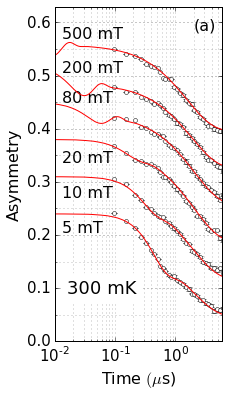

In [569]:
# decoupling 300mK
#plot data
#here input the parameters
#####################
#%matplotlib
fig=plt.figure(figsize=(3,6))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0.01, 6), ylim=(0., 0.63),xscale='log')

#fig_label=("5 mT","10 mT","20 mT","80 mT","200 mT","500 mT")
#tex_pos=np.array((0.21,0.285,0.37,0.42,0.49,0.57,0.65,0.70))
#tex_pos=np.array((0.2,0.275,0.35,0.43,0.495,0.569))
fig_label=("ZF","RF","5 mT","10 mT","20 mT","80 mT","200 mT","500 mT")
tex_pos=np.array((0.205,0.27,0.336,0.45,0.505,0.57))
markers=("o","<",">","^","d")
mkfaceCor=("red","black","blue","green","orange")
#####################
for idx,i in enumerate(plotNo):
    plt.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=linw)
    plt.errorbar(dat[idx,:,0],dat[idx,:,1],dat[idx,:,2],label=fig_label[idx],color='black', fmt='o',markersize='4', mfc='white', zorder=1)
    #plt.text(0.015, tex_pos[i],fig_label[i],size=texfs, ha='left', va='center', backgroundcolor='white',zorder=0,bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))
    ax.annotate(fig_label[i],xy=(0.013, tex_pos[idx]-0.005), fontsize=texfs, ha='left', va='bottom',zorder=1).draggable()
ax.annotate("(a)",xy=(2, 0.58), fontsize=texfs, ha='left', va='bottom').draggable()
plt.text(0.06, 0.1,'300 mK',size=titfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'))

plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)
plt.xticks( color='k', size=tickfs)
plt.yticks( color='k', size=tickfs)

ax=plt.gca() # get the fig axis
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.grid(b=True,which='both', color='grey', marker='o',zorder=0)

ax.set_axisbelow(True)# set gridline below fram and data
#fig.savefig("D:/4_muonSR/data_plot/ltf_300mk_decoupling_ms4.eps", bbox_inches="tight",verbose=True)      
fig.show()

In [8]:
### decoupling 500mK log and liner with log
fpath11='D:/4_muonSR/data_plot/Fields8_0-5kG_500mk_GssKT_8us.dat'
data = np.genfromtxt(fpath11, dtype=None, skip_header=1,delimiter=",")

In [9]:
### decoupling 500mK log and liner with log
#here input the parameters
#####################
datasets    =8 #no of data sets
plotNo      =np.array((2,3,4,5,6,7)) #plot which datasets
theoryd     =datasets #no theory of data sets
binning_pts =70 # how many binning points
shiftd      =0.07 # shift data by a value
####################

dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
datlin     = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data###linear binning 

theory_len = np.size(data[~np.isnan(data[:,datasets*3]),datasets*3]) # the datasets*3 th col is the first theoty dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 

#log binning data
for idx, i in enumerate(3*plotNo): 
    dat[idx,:,:]=np.transpose(log_binning(data[:,i],data[:,i+1],binning_pts))
    datlin[idx,:,:]=np.transpose(lin_binning(data[:,i],data[:,i+1],binning_pts))
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i  
    datlin[i,:,1]=datlin[i,:,1]+shiftd*i  
for idx, i in enumerate(3*datasets+2*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i],data[:,i+1]+shiftd*idx

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:43: RuntimeWarning: invalid value encountered in sqrt


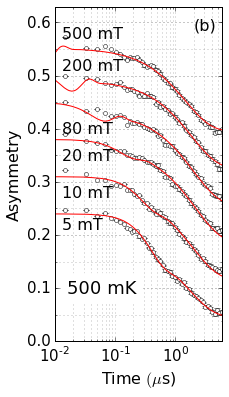

In [10]:
### decoupling 500mK log and liner with log
#plot data
#here input the parameters
#####################
#%matplotlib
fig=plt.figure(figsize=(3,6))
ax = fig.add_subplot(111, autoscale_on=False, 
                     xlim=(0.01, 6), ylim=(0., 0.63),xscale='log')

fig_label=("ZF","RF","5 mT","10 mT","20 mT","80 mT","200 mT","500 mT")
#tex_pos=np.array((0.22,0.275,0.335,0.375,0.47,0.52))
tex_pos=np.array((0.21,0.27,0.34,0.39,0.51,0.57))
markers=("o","<",">","^","d","d")
mkfaceCor=("red","black","blue","green","orange","orange")
#####################
for idx, i in enumerate(plotNo):
    plt.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=linw)
    plt.errorbar(dat[idx,:,0],dat[idx,:,1],dat[idx,:,2],label=fig_label[i],color='black', fmt='o',markersize='4', mfc='white', zorder=1)
    ax.annotate(fig_label[i],xy=(0.013, tex_pos[idx]-0.005), fontsize=texfs, ha='left', va='bottom',zorder=1).draggable()

ax.annotate("(b)",xy=(2, 0.58), fontsize=texfs, ha='left', va='bottom').draggable()
ax.text(0.06, 0.1,'500 mK',size=titfs, ha='center', va='center', backgroundcolor='white',bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'))

plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)
plt.xticks( color='k', size=tickfs)
plt.yticks( color='k', size=tickfs)

ax=plt.gca() # get the fig axis
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

ax.set_axisbelow(True)# set gridline below fram and data
#fig.savefig("D:/4_muonSR/data_plot/ltf_500mk_decoupling_ms4.eps", bbox_inches="tight",verbose=True)      
plt.grid(b=True,which='both', color='grey', marker='o',zorder=0)
fig.show()

In [573]:
#print lin_binning(data[:,0],data[:,0+1],10)
#print np.transpose(lin_binning(data[:,0],data[:,0+1],200)).shape
#print np.shape(datlin)

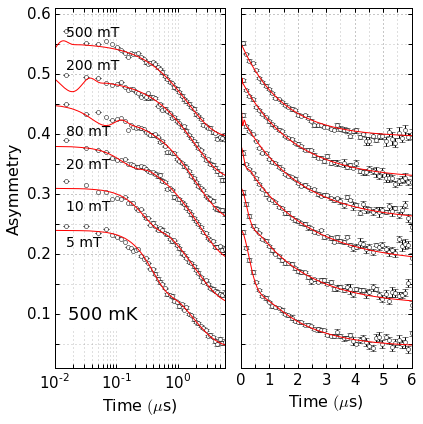

In [13]:
### decoupling 500mK log and liner with log
#plot data
#here input the parameters
#####################
#plt.figure(figsize=(5,10))
fig_label=("ZF","RF","5 mT","10 mT","20 mT","80 mT","200 mT","500 mT")
tex_pos=np.array((0.21,0.27,0.34,0.395,0.505,0.56))+0.01
markers=("o","<",">","^","d")
mkfaceCor=("red","black","blue","green","orange")

#####################
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True,figsize=(6,6))

ax = axs[0]
for idx, i in enumerate(plotNo):
    ax.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=linw)
    ax.errorbar(dat[idx,:,0],dat[idx,:,1],dat[idx,:,2],label=fig_label[i],color='black', fmt='o',markersize='4', mfc='white', zorder=1)
    ax.annotate(fig_label[i],xy=(0.015, tex_pos[idx]-0.012), fontsize=14, ha='left', va='bottom').draggable()

#ax.annotate("(b)",xy=(2, 0.58), fontsize=texfs, ha='left', va='bottom').draggable()
ax.text(0.06, 0.1,'500 mK',size=titfs, ha='center', va='center', backgroundcolor='white',zorder=3,bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'))

#set axis limit and label
ax.set_xscale('log')
ax.set_xlim(0.01, 6)
ax.set_ylim(0., 0.61)
ax.set_ylabel('Asymmetry',size=axfs)
ax.set_xlabel(r"Time $(\mu$s)",size=axfs)

ax.tick_params(axis='both',which='both',width=1,length=4,labelsize=tickfs) # tick (bar size and label size):if both: x or and 2nd both: minor or major

#set grid accordding to minor or major ticks
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.grid(b=True, which='both', color='grey', marker='o',zorder=0,linewidth=glinw)
ax.set_axisbelow(True)# set gridline below fram and data

## linear x plot
ax = axs[1]
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    ii=np.int(i)
    ax.plot(theory[:,ii*2],theory[:,ii*2+1],color='red',linewidth=1)
    ax.errorbar(datlin[ii,:,0],datlin[ii,:,1],datlin[ii,:,2],label=fig_label[i],color='black', fmt='o',markersize='4', mfc='white', zorder=1)

ax.set_xlim(0.01, 6)
ax.set_ylim(0.01, 0.61)
#plt.setp(ax.get_yticklabels(), visible=True)
ax.tick_params(axis='both',which='both',width=1,length=4,labelsize=tickfs) # tick (bar size and label size):if both: x or and 2nd both: minor or major
ax.set_xlabel(r"Time $(\mu$s)",size=axfs)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.grid(b=True, which='both', color='grey', marker='o',zorder=0,linewidth=glinw)
ax.set_axisbelow(True)# set gridline below fram and data

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)
fig.tight_layout()
fig.savefig("D:/4_muonSR/data_plot/new_ltf_500mk_decoupling1.eps", bbox_inches="tight",verbose=True)  
plt.show()

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:31: RuntimeWarning: invalid value encountered in divide
C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: invalid value encountered in divide
C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:33: RuntimeWarning: invalid value encountered in divide
C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: invalid value encountered in sqrt


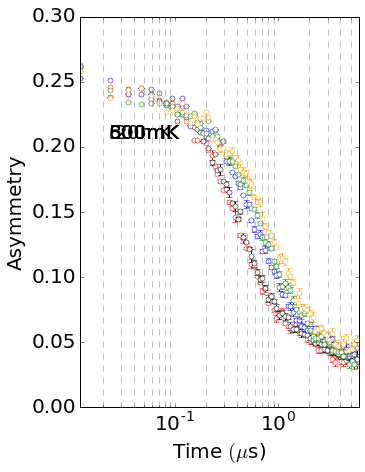

In [82]:
#####################Note: This cold not allow choose which dataset to plot####################
#####################Note: This cold not allow choose which dataset to plot####################
#####################Note: This cold not allow choose which dataset to plot####################
########################## can not choose which which data to shift and plot
# ZF 5 Temperatrues
%matplotlib qt
fpath='D:/4_muonSR/data_plot/dynNKZF_5Ts.dat'
data = np.genfromtxt(fpath, dtype=None, skip_header=1,delimiter=",")

##### here input the parameters
datasets    =5 #no of data sets
theoryd     =datasets #no theory of data sets
binning_pts =100 # how many binning points
shiftd      =0.# shift data by a value
##### Initiolize 3D arrays
dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
theory_len = np.size(data[~np.isnan(data[:,datasets*3]),datasets*3]) # the datasets*3 th col is the first theoty dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 

#log binning data
for idx, i in enumerate(np.linspace(0,datasets*3,num=datasets, endpoint=False,dtype='int32')): 
    dat[idx,:,:]=np.transpose(log_binning(data[:,i],data[:,i+1],binning_pts))
    
#shift the data and theory data sucessively
for i in np.linspace(0,datasets,num=datasets, endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i     
for idx, i in enumerate(np.linspace(datasets*3,datasets*(3+2),num=datasets, endpoint=False,dtype='int32')):
    #ii=np.int(i) #convert to np int for arrary indexing    
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i],data[:,i+1]+shiftd*idx
    
#plot data
###### Here input the parameters
plt.figure(figsize=(5,7))
fig_label=("20mK","300mK","500mK","600mK","800mK","1.2K")
markers=("o","<",">","^","d")
mkfaceCor=("red","black","blue","green","orange")
###### Plot
for i in range(0,datasets):
    ii=np.int(i)
    #plt.plot(theory[:,ii*2],theory[:,ii*2+1],color='red',linewidth=2)
    plt.errorbar(dat[ii,:,0],dat[ii,:,1],dat[ii,:,2],label=fig_label[i],color=mkfaceCor[ii], fmt='o',markersize='5', 
                 mfc='white',mec=mkfaceCor[ii], zorder=1)
    plt.text(0.05, 0.21+shiftd*i,fig_label[i],size=20, ha='center', va='center', backgroundcolor='white',zorder=0,
             bbox=dict(facecolor='none', edgecolor='white', boxstyle='round')
            )
    #plt.errorbar(dat[ii,:,0],dat[ii,:,1],dat[ii,:,2],label=fig_label[i], fmt='-o',ms='10', mfc='white', mec=None,zorder=1)
    #plt.scatter(dat[ii,:,0],dat[ii,:,1],marker='o',zorder=1)
    #plt.plot(dat[ii,:,0],dat[ii,:,1], marker = markers[i],markerfacecolor=mkfaceCor[i],markeredgecolor=None, linestyle = '')
    #plt.annotate(fig_label[i], xy=(0.2, 0.2), xytext=(0.2,0.2+0.1*i), textcoords='offset points', ha='center', va='bottom', bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))

plt.xscale('log')
plt.grid(b=True, which='minor', color='grey', linestyle='--',zorder=0)
#plt.legend()
plt.xlim(0., 6)
plt.ylabel('Asymmetry',size='20')
plt.xlabel(r"Time $(\mu$s)",size='20')
# Setting the x-axis major tick's location
#ax.set_xticks([-200,-150,-100,-50,0,50,100,150,200])
# Setting the x-axis major tick's label
#plt.yaxis.label(size=10)
plt.xticks( color='k', size=20)
plt.yticks( color='k', size=20)
plt.show()

In [2]:
################################
####ZF temperatrue scan data
fpath2='D:/4_muonSR/data_plot/Ts15_0-4p2K_NK_8us.dat'
data = np.genfromtxt(fpath2, dtype=None, skip_header=1,delimiter=",")

In [22]:
####ZF temperatrue scan data
#here input the parameters
#####################
datasets    =15 #no of data sets
#plotNo      =np.array((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14)) #plot which datasets
plotNo      =np.array([1,2,4,6,8,11,12,13]) #plot which datasets
plotNo      =np.array((0,6,11,14)) #plot which datasets
theoryd     =datasets #no theory of data sets
binning_pts =75 # how many log binning points
lbinning_pts =120 # how many linear binning points
shiftd      =0.06# shift data by a value
shiftd      =0
####################
   
## new: log and linear binning
dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
datlin     = np.zeros((datasets,lbinning_pts,3)) #3D arrary, page,row,col, to store the binned data###linear binning 

theory_len = np.size(data[~np.isnan(data[:,datasets*3]),datasets*3]) # the datasets*3 th col is the first theoty dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 

#log and linear binning data
for idx, i in enumerate(3*plotNo): 
    dat[idx,:,:]=np.transpose(log_binning(data[:,i],data[:,i+1],binning_pts))
    datlin[idx,:,:]=np.transpose(lin_binning(data[:,i],data[:,i+1],lbinning_pts))
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i  
    datlin[i,:,1]=datlin[i,:,1]+shiftd*i  
for idx, i in enumerate(3*datasets+2*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i],data[:,i+1]+shiftd*idx

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:45: RuntimeWarning: invalid value encountered in sqrt


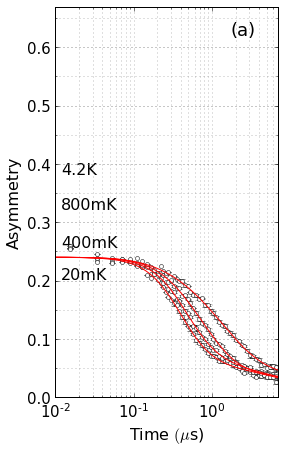

In [23]:
####ZF temperatrue scan data
#plot data
#here input the parameters
#####################
%matplotlib inline
fig=plt.figure(figsize=(4,7))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0.01, 7), ylim=(0., 0.67),xscale='log')

#fig_label=("20mK","300mK","500mK","600mK","800mK","1.2K")
#fig_label=plotNo.astype('str')
fig_label=("20mK","50mK","100mK","200mK","300mK","350mK","400mK","450mK","500mK",
             "600mK","700mK","800mK","1.2K","2.2K","4.2K")
tex_pos=np.array([0.21,0.265,0.33,0.39,0.455,0.51,0.575,0.63])# for 0.07 shiftting and not include 20mk
#tex_pos=np.array([0.22,0.27,0.315,0.37,0.42,0.47,0.515,0.57,0.62])# for 0.05 shiftting and include 20mk
markers=("o","<",">","^","d","o","<")
mkfaceCor=("red","black","blue","green","orange")
#####################
for idx, i in enumerate(plotNo):
    ax.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=linw) 
    ax.errorbar(dat[idx,:,0],dat[idx,:,1],dat[idx,:,2],color='black', fmt='o',markersize='4', mfc='white', zorder=1)   
    ax.text(0.012,tex_pos[idx],fig_label[i],size=texfs, ha='left', va='center', 
            backgroundcolor='white',zorder=0,bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))
    
ax.text(2.5,0.63,"(a)",size=18, ha='center', va='center', 
            backgroundcolor='white',zorder=3,bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))

#circle1=plt.Circle((6,0.045),0.5,color='b',fill=False,clip_on=False)
#fig.gca().add_artist(circle1)
#ax.plot((1.4),(0.06),'o',ms=30,color='b',mfc='none',mec='blue')

plt.xticks( color='k', size=tickfs)
plt.yticks( color='k', size=tickfs)

ax=plt.gca() # get the fig axis
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

###try to remove the gridline on the fig border but failed
#ax.yaxis.get_minor_ticks().pop(-1)
#ax.set_yticks(yticks,minor=True)
#yticks[0].label1.set_visible(False)
#yticks[-1].label1.set_visible(False)

plt.grid(b=True,which='both', color='grey', marker='o',clip_on=True,linewidth=glinw, zorder=0)
#plt.legend()

plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)

#put the tickline and gridlines below the fig border
for k, spine in ax.spines.items():  #ax.spines is a dictionary
    spine.set_zorder(10)
ax.set_axisbelow(True)
    
plt.show()
#fig.savefig("D:/4_muonSR/data_plot/ltf_ZF_8Ts_GbG_new.eps", bbox_inches="tight",verbose=True)  

In [ ]:
yticks=ax.yaxis.get_minor_ticks()
print yticks
yticks.pop(-1) #remove the last element
print yticks

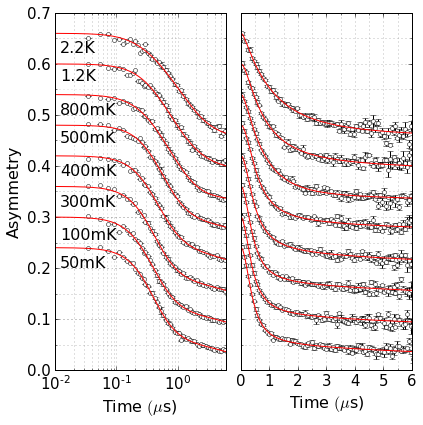

In [9]:
### 20mk - 4.2 K log and liner  plot
#plot data
#here input the parameters
#####################
#plt.figure(figsize=(5,10))
fig_label=("20mK","50mK","100mK","200mK","300mK","350mK","400mK","450mK","500mK",
             "600mK","700mK","800mK","1.2K","2.2K","4.2K")
tex_pos=np.array([0.21,0.265,0.33,0.39,0.455,0.51,0.575,0.63])# for 0.07 shiftting and not include 20mk
#tex_pos=np.array([0.22,0.27,0.315,0.37,0.42,0.47,0.515,0.57,0.62])# for 0.05 shiftting and include 20mk
markers=("o","<",">","^","d","o","<")
mkfaceCor=("red","black","blue","green","orange")

#####################
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6,6),sharey=True)# if not share Y, then 2nd plot shows Yticklabels

ax = axs[0]
for idx, i in enumerate(plotNo):
    ax.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=linw) 
    ax.errorbar(dat[idx,1:,0],dat[idx,1:,1],dat[idx,1:,2],color='black', fmt='o',markersize='4', mfc='white', zorder=1)   
    ax.text(0.012,tex_pos[idx],fig_label[i],size=texfs, ha='left', va='center', 
            backgroundcolor='white',zorder=1,bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))
    
#ax.text(2.5,0.63,"(a)",size=18, ha='center', va='center', 
#            backgroundcolor='white',zorder=3,bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))

#plt.xscale('log') # this one changes all the fig scales
ax.set_xscale('log')
ax.set_xlim(0.01, 6)
ax.set_ylim(0., 0.7)
ax.tick_params(axis='both', which='major', labelsize=tickfs)

ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.grid(b=True,which='both', color='grey', marker='o', clip_on=True, linewidth=glinw, zorder=0)
#plt.legend()
#plt.ylable('Asymmetry',size=axfs) # this one only set the axis lable for the last fig
ax.set_ylabel('Asymmetry',size=axfs)
ax.set_xlabel(r"Time $(\mu$s)",size=axfs)
ax.set_axisbelow(True)
# #put the tickline and gridlines below the fig border
# for k, spine in ax.spines.items():  #ax.spines is a dictionary
#     spine.set_zorder(10)


## linear x plot
ax = axs[1]
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    ii=np.int(i)
    ax.plot(theory[:,ii*2],theory[:,ii*2+1],color='red',linewidth=1)
    ax.errorbar(datlin[ii,:,0],datlin[ii,:,1],datlin[ii,:,2],label=fig_label[i],color='black', fmt='o',markersize='4', mfc='white', zorder=1)

ax.set_xlim(0.01, 6)
#ax.set_ylim(0., 0.7)
#plt.xscale('linear')# it changes all
ax.set_xlabel(r"Time $(\mu$s)",size=axfs)
ax.tick_params(axis='both', which='major', labelsize=tickfs)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.grid(b=True,which='minor', color='grey', marker='o',zorder=0,linewidth=glinw)

ax.set_axisbelow(True)
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=None)
fig.tight_layout()
#fig.savefig("D:/4_muonSR/data_plot/new_ltf_ZF_8Ts_GbG.eps", bbox_inches="tight",verbose=True)  
plt.show()

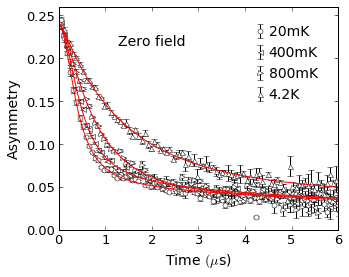

In [59]:
# 20mk - 4.2K: plot linear
%matplotlib inline
fig=plt.figure(figsize=(4,7))
fig=plt.figure(figsize=(5,4))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0.01, 6), ylim=(0., 0.26),xscale='linear')

#fig_label=("20mK","300mK","500mK","600mK","800mK","1.2K")
#fig_label=plotNo.astype('str')
fig_label=("20mK","50mK","100mK","200mK","300mK","350mK","400mK","450mK","500mK",
             "600mK","700mK","800mK","1.2K","2.2K","4.2K")
tex_pos=np.array([0.22,0.27,0.315,0.37,0.425,0.475,0.53,0.595,0.66])-0.145
markers=("o","<",">","^","d","o","<")
mkfaceCor=("black","green","purple","blue","black")
#####################
for idx, i in enumerate(plotNo):
    ax.plot(theory[:,idx*2],theory[:,idx*2+1],color='red',linewidth=linw) 
    ax.errorbar(datlin[idx,:,0],datlin[idx,:,1],datlin[idx,:,2], fmt=markers[idx],markersize='5', mfc='white', color='black',
                zorder=1,label=fig_label[i])   #mec=mkfaceCor[idx],ecolor=mkfaceCor[idx],
#     ax.text(1.5,tex_pos[idx],fig_label[i],size=texfs, ha='left', va='center', zorder=1,
#             backgroundcolor='white',bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))
    
ax.text(2,0.22,"Zero field",size=14, ha='center', va='center', 
            backgroundcolor='white',zorder=3,bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))

#circle1=plt.Circle((6,0.045),0.5,color='b',fill=False,clip_on=False)
#fig.gca().add_artist(circle1)
#ax.plot((1.4),(0.06),'o',ms=30,color='b',mfc='none',mec='blue')

plt.xticks( color='k', size=tickfs-2)
plt.yticks( color='k', size=tickfs-2)

ax=plt.gca() # get the fig axis
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

###try to remove the gridline on the fig border but failed
#ax.yaxis.get_minor_ticks().pop(-1)
#ax.set_yticks(yticks,minor=True)
#yticks[0].label1.set_visible(False)
#yticks[-1].label1.set_visible(False)

# plt.grid(b=False,which='both', color='grey', marker='o',clip_on=True,linewidth=0.5,zorder=0)
plt.legend(numpoints=1,loc=[0.65,0.55],handletextpad=-0.4,borderaxespad=-0.2,
             frameon=False,framealpha=1,fontsize=14,fancybox=True,shadow=False)


plt.ylabel('Asymmetry',size=axfs-2)
plt.xlabel(r"Time $(\mu$s)",size=axfs-2)

#put the tickline and gridlines below the fig border
for k, spine in ax.spines.items():  #ax.spines is a dictionary
    spine.set_zorder(10)

plt.show()
fig.savefig("D:/4_muonSR/data_plot/ltf_ZF_8Ts_GbG_new1.eps", bbox_inches="tight",verbose=True)  

In [ ]:
################################
####ZF temperatrue scan data 5bins
#fpath2='D:/4_muonSR/data_plot/Ts15_0-4p2K_NK_8us_5bins.dat' #new data format
#data = np.genfromtxt(fpath2, dtype=None, skip_header=1,delimiter=",")

In [18]:
###try to see other style fig to preszent the data properly

####ZF temperatrue scan data
#here input the parameters
#####################
datasets    =15 #no of data sets
#plotNo      =np.array((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14)) #plot which datasets
#plotNo      =np.array((0,1,2,4,6,8,11,12,13)) #plot which datasets
plotNo      =np.array((0,4,6,7,8,11)) # for show the Gaussian 
#plotNo      =np.array((0,3,5,6,7,9,11))
theoryd     =datasets #no theory of data sets
binning_pts =500 # how many binning points
shiftd      =0.023# shift data by a value
####################
dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
theory_len = np.size(data[~np.isnan(data[:,-1]),-1]) # the last col is a theoty dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 
   
#log binning data
for idx, i in enumerate(3*plotNo): 
    dat[idx,:,:]=np.transpose(log_binning(data[:,i],data[:,i+1],binning_pts))
    
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i  
    
for idx, i in enumerate(3*datasets+2*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i],data[:,i+1]+shiftd*idx

#this code is different form others, for new arragement in the file
#log binning data
#for idx, i in enumerate(5*plotNo): 
    #dat[idx,:,:]=np.transpose(lin_binning(data[:,i],data[:,i+1],binning_pts))
#for idx, i in enumerate(5*plotNo):
    #theory[:,idx*2],theory[:,idx*2+1]=data[~np.isnan(data[:,i+3]),i+3],data[~np.isnan(data[:,i+4]),i+4]+shiftd*idx

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:43: RuntimeWarning: invalid value encountered in sqrt


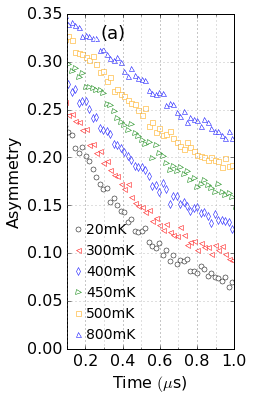

In [19]:
####ZF temperatrue scan data
#here input the parameters
#####################
%matplotlib inline
fig=plt.figure(figsize=(3,6))
ax = fig.add_subplot(111, autoscale_on=False, 
                     xlim=(0.1, 1), ylim=(0.0, 0.35),xscale='linear')

#fig_label=plotNo.astype('str')
fig_label=("20mK","50mK","100mK","200mK","300mK","350mK","400mK","450mK","500mK",
             "600mK","700mK","800mK","1.2K","2.2K","4.2K")
tex_pos=np.array((0.2,0.28,0.36,0.435,0.5,0.58))
markers=("o","<","d",">","s","^","D","H","d","<",">","^","d","<","^","d")
mkfaceCor=("black","red","blue","green","orange","blue","green","orange","blue","green","orange","blue","green","orange","blue","green","orange")
#####################
for idx, i in enumerate(plotNo):
    ax.errorbar(dat[idx,:,0],dat[idx,:,1],dat[idx,:,2],label=fig_label[i],color='w', 
                fmt=markers[idx],markersize='5',mec=mkfaceCor[idx], zorder=1)

ax.text(0.35,0.33,"(a)",size=18, ha='center', va='center', 
            backgroundcolor='white',zorder=3,bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))

l=plt.legend(numpoints=1,loc=(-0.05,0.005),handletextpad=-0.4,borderaxespad=-0.2,
             frameon=False,framealpha=1,fontsize=14,fancybox=True,shadow=False)
#l.draggable()

plt.grid(b=True,which='both', color='grey', marker='o',clip_on=True,zorder=0)
plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)
plt.xticks( color='k', size=axfs)
plt.yticks( color='k', size=axfs)

major_ticks = np.arange(0.2, 1.1, 0.2)                                              
minor_ticks = np.arange(0.1, 1.1, 0.1)                                               
ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)   

plt.show()
#fig.savefig("D:/4_muonSR/data_plot/ltf_ZF_gauss.eps", bbox_inches="tight",verbose=True)  

In [20]:
####ZF temperatrue scan data
#here input the parameters
#####################
datasets    =15 #no of data sets
#plotNo      =np.array((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14)) #plot which datasets
#plotNo      =np.array((0,2,3,6,8,9,11,12)) #plot which datasets
plotNo      =np.array((0,3,5,7,10,11,12)) # for show the local minimum
theoryd     =datasets #no theory of data sets
binning_pts =105 # how many binning points
shiftd      =0.017# shift data by a value
####################
dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
theory_len = np.size(data[~np.isnan(data[:,datasets*3]),datasets*3]) # the datasets*3 th col is the first theoty dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 
#log binning data
for idx, i in enumerate(3*plotNo): 
    dat[idx,:,:]=np.transpose(log_binning(data[:,i],data[:,i+1],binning_pts))   
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i      
for idx, i in enumerate(3*datasets+2*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i],data[:,i+1]+shiftd*idx

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:43: RuntimeWarning: invalid value encountered in sqrt


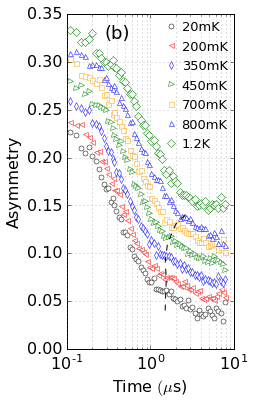

In [21]:
####ZF temperatrue scan data
#plot data with no shiftting
#here input the parameters
#####################
#%matplotlib qt
fig=plt.figure(figsize=(3,6))
ax = fig.add_subplot(111, autoscale_on=False, 
                     xlim=(0.1, 10), ylim=(0.0, 0.35),xscale='log')
#fig_label=plotNo.astype('str')
fig_label=("20mK","50mK","100mK","200mK","300mK","350mK","400mK","450mK","500mK",
             "600mK","700mK","800mK","1.2K","2.2K","4.2K")
tex_pos=np.array((0.2,0.28,0.36,0.435,0.5,0.58))
markers=("o","<","d",">","s","^","D","H","d","<",">","^","d","<","^","d")
mkfaceCor=("black","red","blue","green","orange","blue","green","orange","blue","green","orange","blue","green","orange","blue","green","orange")
#####################
for idx, i in enumerate(plotNo):
    ax.errorbar(dat[idx,:,0],dat[idx,:,1],dat[idx,:,2],label=fig_label[i],color='w', 
                fmt=markers[idx],markersize='5',mec=mkfaceCor[idx], zorder=1)

ax.text(0.4,0.33,"(b)",size=18, ha='center', va='center', 
            backgroundcolor='white',zorder=3,bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))

l=plt.legend(numpoints=1,loc='best',handletextpad=-0.2,borderaxespad=0.1,
              frameon=False,framealpha=1,fontsize=13,fancybox=True,shadow=False)
l.draggable()
#print l.get_bbox_to_anchor()

#split the legend
# handles, labels = ax.get_legend_handles_labels()
# l0=plt.legend([handles[0],handles[1],handles[2],handles[3]],
#               [labels[0],labels[1],labels[2],labels[3]],loc='lower left',numpoints=1,
#               handletextpad=-0.2,borderaxespad=0.2,
#               frameon=False,framealpha=1,fontsize=12,fancybox=True,shadow=False)
# plt.gca().add_artist(l0)
# plt.legend([handles[4],handles[5],handles[6]], 
#            [labels[4],labels[5],labels[6]],
#            loc='best',numpoints=1,handletextpad=0,borderaxespad=0.2,
#            frameon=False,framealpha=1,fontsize=12,fancybox=True,shadow=False)

plt.grid(b=True,which='both', color='grey', marker='o',clip_on=True,zorder=0)
plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)
plt.xticks( color='k', size=axfs)
plt.yticks( color='k', size=axfs)

# draw one cureved line to show the shiftting of the inflection point
from scipy.interpolate import spline
px = np.array([1.5,1.55,1.5,1.6,2.,2.6,3,3.2])
py = np.array([0.04,0.075,0.09,0.11,0.13,0.14,0.142,0.143])

#pxnew = np.linspace(px.min(),px.max(),30)
#py_smooth = spline(px,py,pxnew)
plt.plot(px[:-1],py[:-1],color='black', linestyle='--',linewidth=1,zorder=10)
#plt.plot(pxnew,py_smooth)

plt.show()
#fig.savefig("D:/4_muonSR/data_plot/ltf_ZF_loc.eps", bbox_inches="tight",verbose=True)  

In [92]:
px = np.array([0.15,0.14,0.15,0.16,2.,2.6])
py = np.array([0.06,0.075,0.09,0.125,0.135,0.14])

pxnew = np.linspace(px.min(),px.max(),30)
py_smooth = spline(px,py,pxnew)

print pxnew,py_smooth

[ 0.14        0.22482759  0.30965517  0.39448276  0.47931034  0.56413793
  0.64896552  0.7337931   0.81862069  0.90344828  0.98827586  1.07310345
  1.15793103  1.24275862  1.32758621  1.41241379  1.49724138  1.58206897
  1.66689655  1.75172414  1.83655172  1.92137931  2.0062069   2.09103448
  2.17586207  2.26068966  2.34551724  2.43034483  2.51517241  2.6       ] [  0.00000000e+00  -2.70197451e+12  -1.27966580e+13  -2.92486842e+13
  -5.08877340e+13  -7.65434884e+13  -1.05045628e+14  -1.35223834e+14
  -1.65907787e+14  -1.95927168e+14  -2.24111658e+14  -2.49290938e+14
  -2.70294688e+14  -2.85952590e+14  -2.95094324e+14  -2.96549571e+14
  -2.89148013e+14  -2.71719329e+14  -2.43093201e+14  -2.02099309e+14
  -1.47567335e+14  -7.83269600e+13   6.79086806e+12   1.04959231e+14
   2.00502682e+14   2.75168472e+14   3.10703849e+14   2.88856064e+14
   1.91372364e+14   2.50000000e-01]


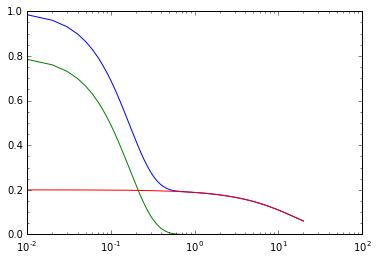

In [6]:
#test: the combinations of two exp (Silver and sample) also give a local minima
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
%matplotlib inline
x=np.arange(0,20,0.01)
y=0.8*np.exp(-(6*x)**1.4)+0.2*np.exp(-0.06*x)
y0=0.8*np.exp(-(6*x)**1.4)
y1=0.2*np.exp(-0.06*x)

y2=0.2*np.exp(-0.03*x)

plt.plot(x,y); 
plt.plot(x,y0);
plt.plot(x,y1); #plt.plot(x,y2)
plt.minorticks_on()
plt.xscale('log')
#it looks like that the local minimun or inflection of the curve may
#not be from the GaussianKT function
#But the data in 5Oe shows very similar with the zero field data and the the 
#minimum is obvious. Now the Ag damping is expectly quenched

In [14]:
####ZF 20 mK compare NK and Gss,  linear binning
################## the file contains 20ZF data twice, and NK, Gss fitting data
#fpath2='D:/4_muonSR/data_plot/ZF_20mk_NK_Gss_20bin_6us.dat'
fpath2='D:/4_muonSR/data_plot/ZF_20mk_NK_Gss_80bin_6us.dat'
data = np.genfromtxt(fpath2, dtype=None, skip_header=1,delimiter=",")

C:\Users\kew\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\transforms.py:660: RuntimeWarning: invalid value encountered in absolute
  inside = ((abs(dx0 + dx1) + abs(dy0 + dy1)) == 0)


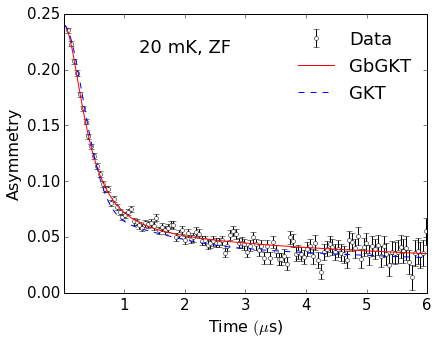

In [15]:
####ZF 20 mK compare NK and Gss, linear binning
#plot data
######here input the parameters
%matplotlib inline
fig=plt.figure(figsize=figsz)
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0.01, 6), ylim=(0., 0.25),xscale='linear')

fig_label=('Data','GbGKT','GKT')
linesty=('-','--')
mkfaceCor=("red","blue","green","orange")
#####################
for idx, i in enumerate(np.array([6,8])):
    ax.plot(data[:,i],data[:,i+1],color=mkfaceCor[idx],
            linestyle=linesty[idx],linewidth=1,label=fig_label[idx+1]) 
    
ax.errorbar(data[1:,0],data[1:,1],data[1:,2],label=fig_label[0],
            color='black', fmt='o',markersize='4', mfc='white', zorder=1)# not plot the first bad point

ax.text(2, 0.22,'20 mK, ZF',size=titfs, ha='center', va='center', 
        backgroundcolor='white',zorder=0,
        bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))
    
#leg = plt.legend(loc='best',numpoints=1,frameon=True,framealpha=1,fontsize=legfs,fancybox=True,shadow=False)
#leg.get_frame().set_edgecolor('w')

handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[2],handles[0],handles[1]], [labels[2],labels[0],labels[1]],
          loc='best',numpoints=1,frameon=False,framealpha=1,fontsize=legfs,fancybox=True,shadow=False)

plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)
plt.xticks( color='k', size=tickfs)
plt.yticks( color='k', size=tickfs)
plt.show()

#fig.savefig("D:/4_muonSR/data_plot/ltf_ZF_20mk_GbG_Gass.eps", bbox_inches="tight",verbose=True)  

In [2]:
## Compare the fitting with three functions: GbG, GKT and streched expo.
#the new data format exported from musrfit is different from former
# that is data theoty data theory...
# decoupling 300mK 
fpath11='D:/4_muonSR/data_plot/20mk_NK_GKT_Strech_compare.dat'
data = np.genfromtxt(fpath11, dtype=None, skip_header=1,delimiter=",")
print data.shape

(10234L, 15L)


In [3]:
# 20mK zero field
#here input the parameters
#####################
datasets    =3 #no of data sets
plotNo      =np.array([0,1,2]) #plot which datasets
theoryd     =datasets #no theory of data sets
binning_pts =80 # how many binning points
shiftd      =0.00# shift data by a value
####################
#this code is different form others, for new arragement in the file
dat        = np.zeros((datasets,binning_pts,3)) #3D arrary, page,row,col, to store the binned data
theory_len = np.size(data[~np.isnan(data[:,-1]),-1]) # the datasets*3 th col is the first theory dat
theory     = np.zeros((theory_len,theoryd*2))#  to store 5 sets of the theory dada 

#kinear binning data
for idx, i in enumerate(5*plotNo): 
    dat[idx,:,:]=np.transpose(lin_binning(data[:,i],data[:,i+1],binning_pts))
    
#shift the data and theory data sucessively
for i in np.linspace(0,plotNo.size,num=plotNo.size,endpoint=False,dtype='int32'):
    dat[i,:,1]=dat[i,:,1]+shiftd*i  
    
for idx, i in enumerate(5*plotNo):  
    theory[:,idx*2],theory[:,idx*2+1]=data[:,i+3],data[:,i+4]+shiftd*idx

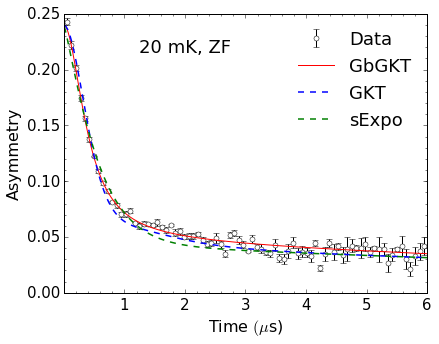

In [8]:
####ZF 20 mK compare NK, Gss, Streched expo., linear binning
#plot data
######here input the parameters
%matplotlib inline
fig=plt.figure(figsize=figsz)
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0.01, 6), ylim=(0., 0.25),xscale='linear')

fig_label=('Data','GbGKT','GKT','sExpo')
linesty=('-','--','--')
linwdth=(1,1.5,1.5)
mkfaceCor=("red","blue","green","orange")

#####################

ax.errorbar(dat[0,:,0],dat[0,:,1],dat[0,:,2],label=fig_label[0],
            color='black', fmt='o',markersize='5', mfc='white', zorder=1)# not plot the first bad point

for idx, i in enumerate(plotNo):
    ax.plot(theory[:,i*2],theory[:,i*2+1],color=mkfaceCor[idx],
            linestyle=linesty[idx],linewidth=linwdth[idx],label=fig_label[idx+1]) 
    
#ax.errorbar(datlin[idx,:,0],datlin[idx,:,1],datlin[idx,:,2],color='black', fmt='o',markersize='4', mfc='white', zorder=1)   

ax.text(2, 0.22,'20 mK, ZF',size=titfs, ha='center', va='center', 
        backgroundcolor='white',zorder=0,
        bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))
    
#leg = plt.legend(loc='best',numpoints=1,frameon=True,framealpha=1,fontsize=legfs,fancybox=True,shadow=False)
#leg.get_frame().set_edgecolor('w')

handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[3],handles[0],handles[1],handles[2]], [labels[3],labels[0],labels[1],labels[2]],
          loc='best',numpoints=1,frameon=False,framealpha=1,fontsize=legfs,fancybox=True,shadow=False)
plt.minorticks_on()
plt.ylabel('Asymmetry',size=axfs)
plt.xlabel(r"Time $(\mu$s)",size=axfs)
plt.xticks( color='k', size=tickfs)
plt.yticks( color='k', size=tickfs)
plt.show()

#fig.savefig("D:/4_muonSR/data_plot/ltf_ZF_20mk_GbG_Gass_Expo.eps", bbox_inches="tight",verbose=True)  